<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-16 12:52:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  66.4MB/s    in 3.0s    

2025-01-16 12:52:50 (66.4 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


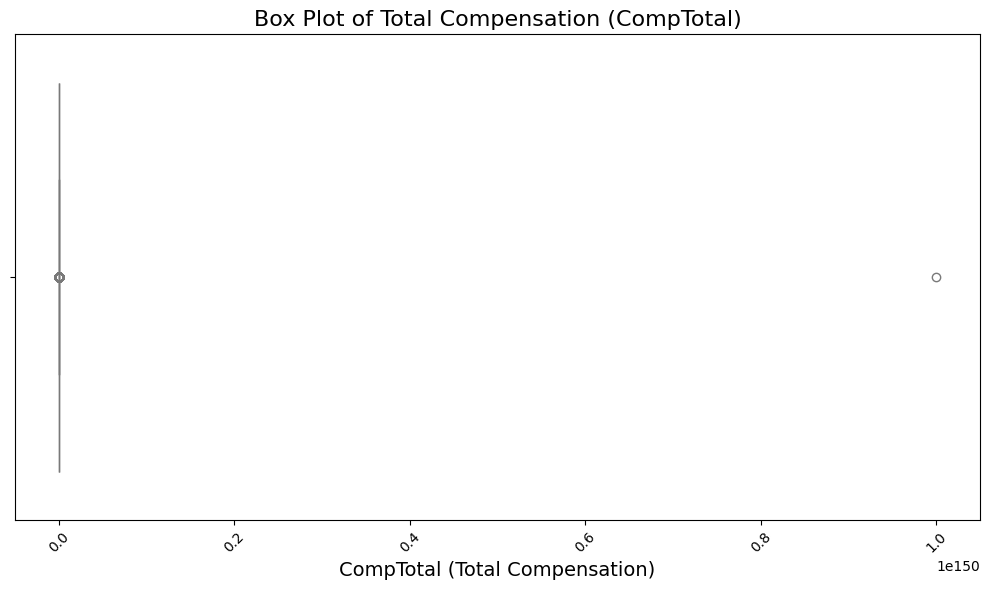

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the relevant column (CompTotal) from the database
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL;"
df = pd.read_sql(query, conn)

# Step 3: Check for any necessary data cleaning (e.g., handling NaN or non-numeric values)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')  # Convert to numeric and handle errors

# Optionally drop rows with NaN values in the 'CompTotal' column
df = df.dropna(subset=['CompTotal'])

# Step 4: Create the box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CompTotal'], color='lightblue')

# Step 5: Customize plot (optional)
plt.title('Box Plot of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('CompTotal (Total Compensation)', fontsize=14)
plt.xticks(rotation=45)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


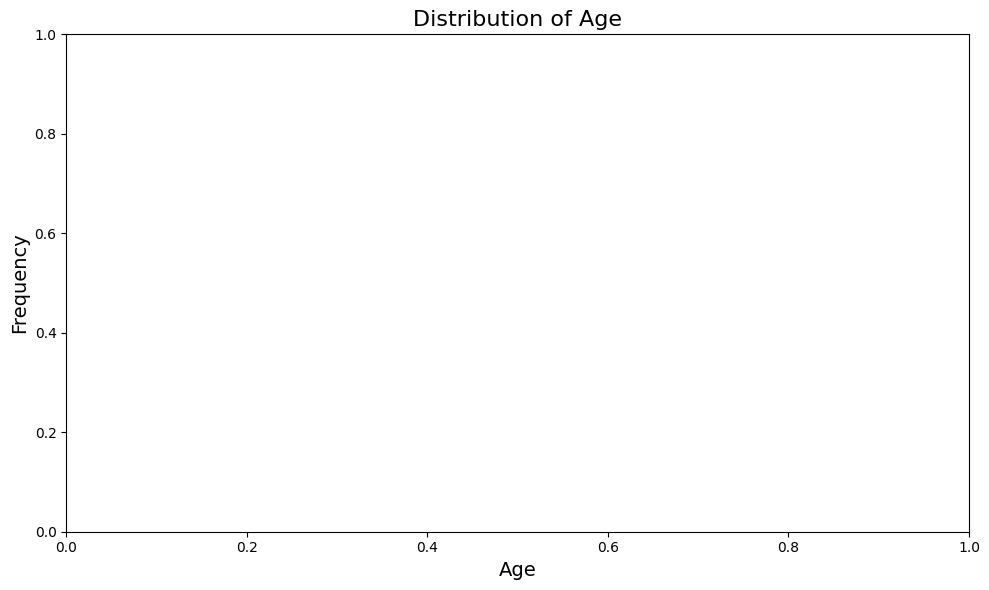

In [11]:
# your code goes here

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get the Age column from the database
query = "SELECT Age FROM main WHERE Age IS NOT NULL;"
df = pd.read_sql(query, conn)

# Step 3: Convert Age column to numeric, handle any non-numeric entries as NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Optionally drop rows with NaN values in the Age column
df = df.dropna(subset=['Age'])

# Step 4: Visualize the distribution of Age using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')

# Step 5: Customize plot
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


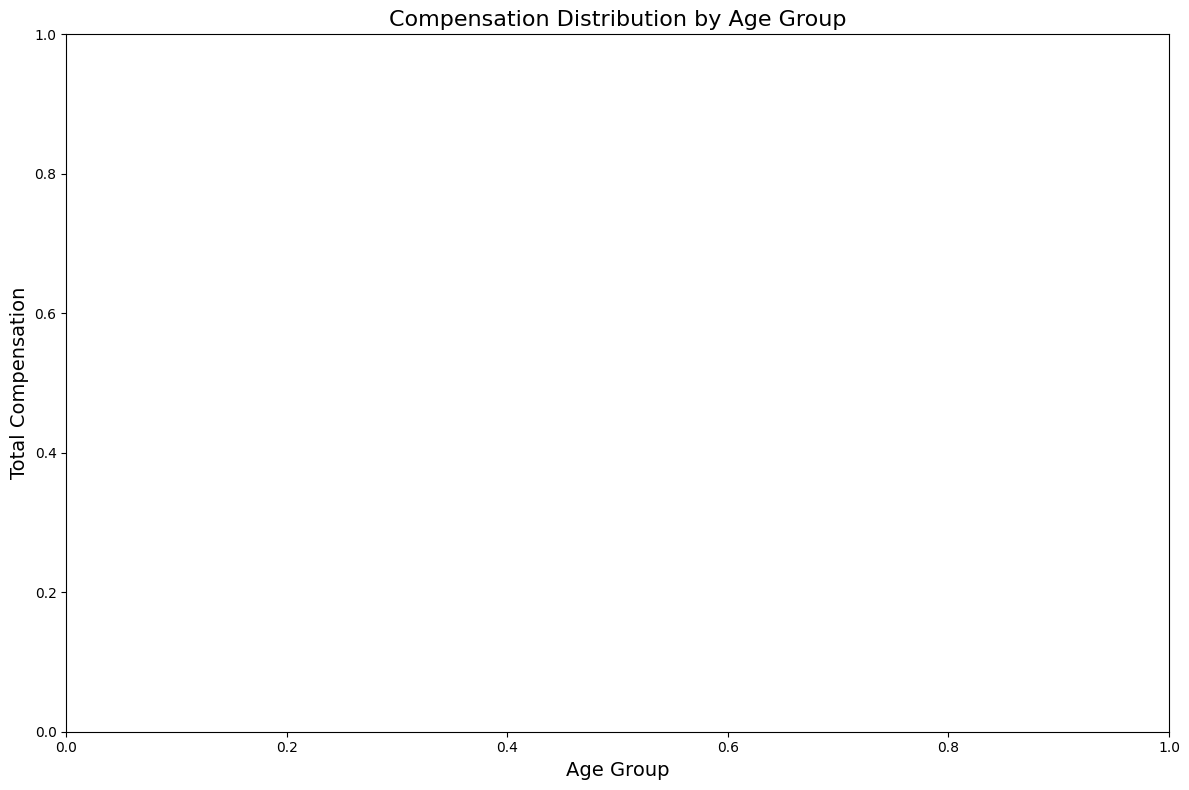

In [15]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get Age and CompTotal columns from the database
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL;"
df = pd.read_sql(query, conn)

# Step 3: Convert Age to numeric, handle errors by coercing non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Optionally drop rows with NaN values in Age or CompTotal columns
df = df.dropna(subset=['Age', 'CompTotal'])

# Step 4: Define age bins and corresponding labels
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges

# Step 5: Create a new column to categorize Age into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 6: Plot a box plot for CompTotal by AgeGroup
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeGroup', y='CompTotal', data=df, palette='Set2')

# Step 7: Customize the plot
plt.title('Compensation Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Compensation', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_2445/2705894198.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='Set2')


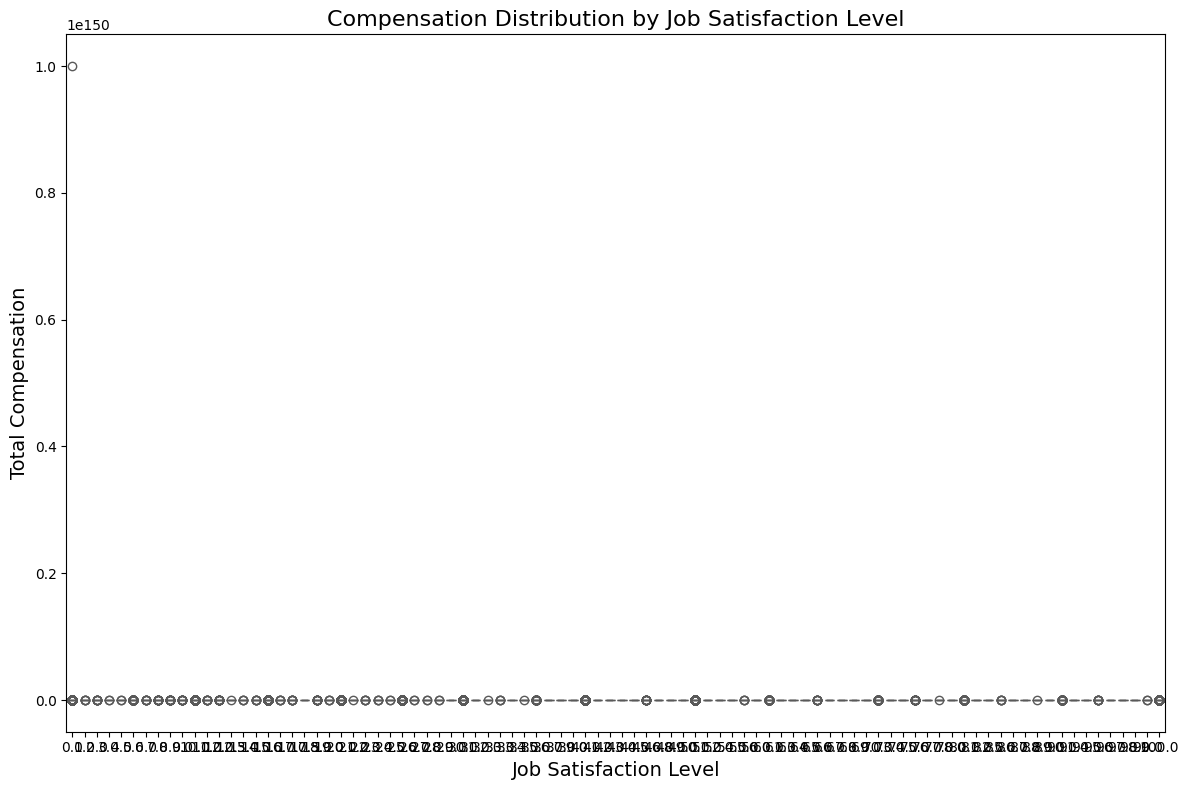

In [17]:


# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get CompTotal and JobSatPoints_6 columns from the database
query = "SELECT CompTotal, JobSatPoints_6 FROM main WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL;"
df = pd.read_sql(query, conn)

# Step 3: Ensure JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Optionally drop rows with NaN values in JobSatPoints_6 or CompTotal columns
df = df.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Step 4: Plot a box plot for CompTotal by JobSatPoints_6 (Job Satisfaction Levels)
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df, palette='Set2')

# Step 5: Customize the plot
plt.title('Compensation Distribution by Job Satisfaction Level', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Total Compensation', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_2445/1006438266.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5, palette='Set2')


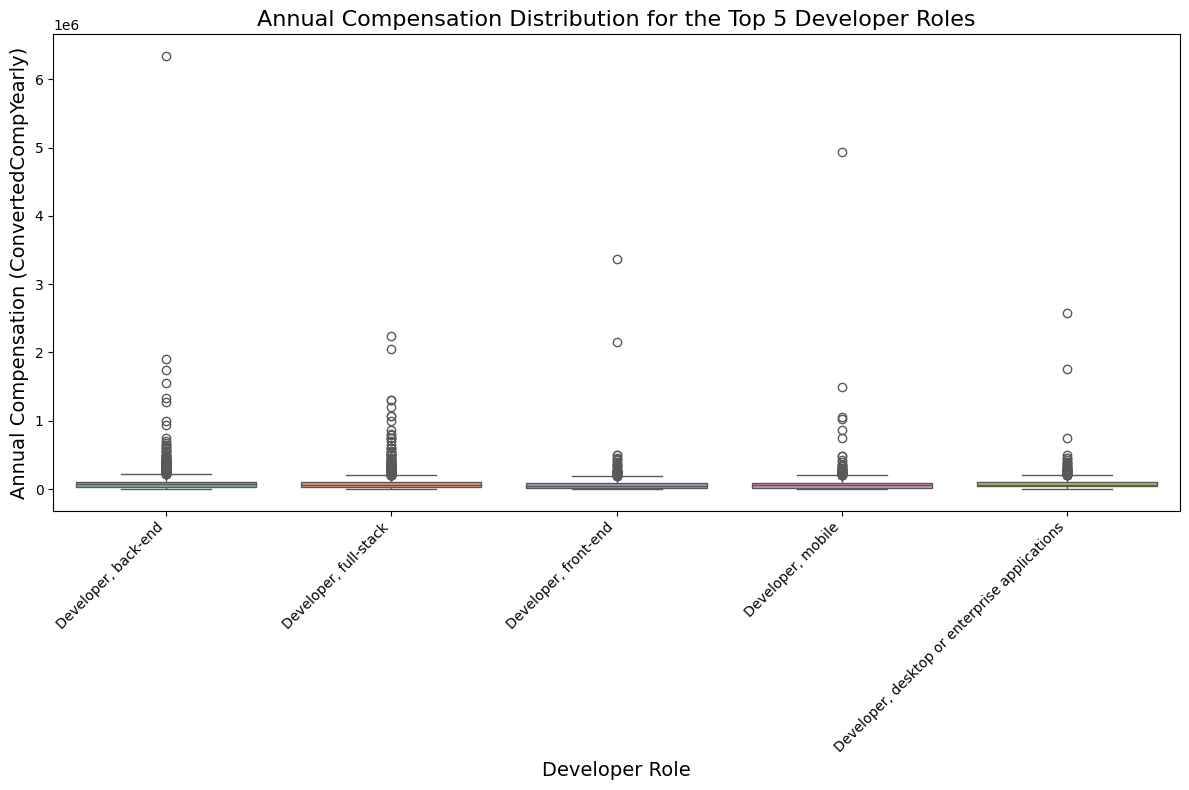

In [18]:
# your code goes here

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get ConvertedCompYearly (compensation) and DevType (developer roles)
query = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean the data - remove rows with missing values in either 'ConvertedCompYearly' or 'DevType'
df.dropna(subset=['ConvertedCompYearly', 'DevType'], inplace=True)

# Step 4: Get the top 5 most common developer roles (DevType)
top_5_dev_types = df['DevType'].value_counts().nlargest(5).index

# Step 5: Filter the dataframe to include only the top 5 developer types
df_top_5 = df[df['DevType'].isin(top_5_dev_types)]

# Step 6: Plot a box plot for ConvertedCompYearly by Developer Type (DevType)
plt.figure(figsize=(12, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5, palette='Set2')

# Step 7: Customize the plot
plt.title('Annual Compensation Distribution for the Top 5 Developer Roles', fontsize=16)
plt.xlabel('Developer Role', fontsize=14)
plt.ylabel('Annual Compensation (ConvertedCompYearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_2445/417658312.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=df_top_5_countries, palette='Set2')


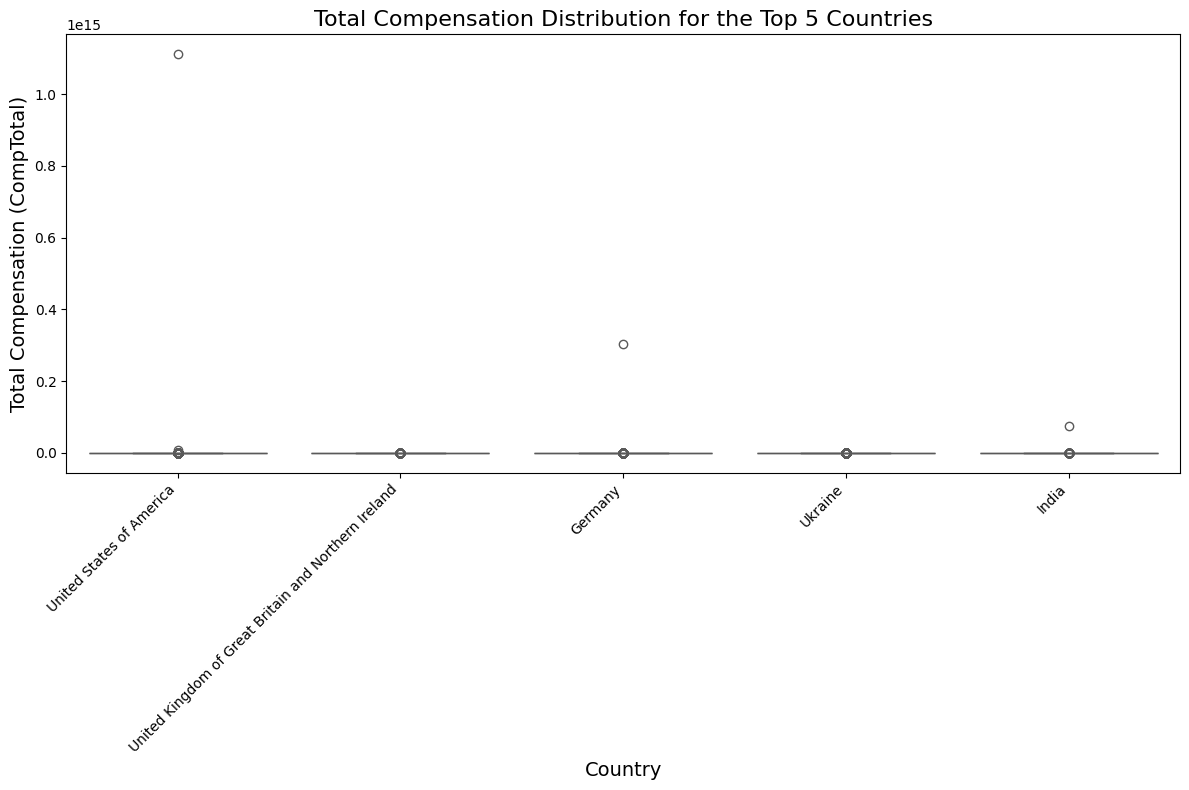

In [20]:
# your code goes here

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Step 2: Query to get CompTotal (compensation) and Country columns
query = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean the data - remove rows with missing values in either 'CompTotal' or 'Country'
df.dropna(subset=['CompTotal', 'Country'], inplace=True)

# Step 4: Get the top 5 countries based on the number of respondents
top_5_countries = df['Country'].value_counts().nlargest(5).index

# Step 5: Filter the dataframe to include only the top 5 countries
df_top_5_countries = df[df['Country'].isin(top_5_countries)]

# Step 6: Plot a box plot for CompTotal by Country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5_countries, palette='Set2')

# Step 7: Customize the plot
plt.title('Total Compensation Distribution for the Top 5 Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Compensation (CompTotal)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [21]:
# your code goes here
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query to get CompTotal (compensation) and EmploymentType columns
query = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND EmploymentType IS NOT NULL;
"""
df = pd.read_sql(query, conn)

# Step 3: Clean the data - remove rows with missing values in either 'CompTotal' or 'EmploymentType'
df.dropna(subset=['CompTotal', 'Employment'], inplace=True)

# Step 4: Plot a box plot for CompTotal by EmploymentType
plt.figure(figsize=(12, 8))
sns.boxplot(x='EmploymentType', y='CompTotal', data=df, palette='Set3')

# Step 5: Customize the plot
plt.title('Total Compensation Distribution by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Total Compensation (CompTotal)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

DatabaseError: Execution failed on sql '
SELECT CompTotal, EmploymentType
FROM main
WHERE CompTotal IS NOT NULL AND EmploymentType IS NOT NULL;
': no such column: EmploymentType

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
